# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharma_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])


# Display the data table for preview
pharma_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [68]:
# Checking the number of mice.
mice_data = pharma_data_complete["Mouse ID"].unique()
mice_data_count = len(mice_data)
mice_data_count

249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_dup = pharma_data_complete[pharma_data_complete[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dup_id = mice_dup["Mouse ID"].unique()
mice_dup_id

array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID.
mice_dup_data = pharma_data_complete[pharma_data_complete["Mouse ID"] == mice_dup_id[0]]
mice_dup_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_clean_data = pharma_data_complete[pharma_data_complete["Mouse ID"] != mice_dup_id[0]]
mice_clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [72]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = mice_clean_data["Mouse ID"].unique()
clean_mice_data_count = len(clean_mice_data)
clean_mice_data_count



248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_reg_data = mice_clean_data.groupby("Drug Regimen")
tum_vol_mean = drug_reg_data["Tumor Volume (mm3)"].mean()
tum_vol_median = drug_reg_data["Tumor Volume (mm3)"].median()
tum_vol_var = drug_reg_data["Tumor Volume (mm3)"].var()
tum_vol_std = drug_reg_data["Tumor Volume (mm3)"].std()
tum_vol_sem = drug_reg_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.

drug_reg_summary = pd.DataFrame({
    "Mean Tumor Volume": tum_vol_mean,
    "Median Tumor Volume": tum_vol_median,
    "Tumor Volume Variance": tum_vol_var,
    "Tumor Volume Std. Dev": tum_vol_std,
    "Tumor Volume Std. Err.": tum_vol_sem 
})
drug_reg_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_reg_summary = mice_clean_data.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
drug_reg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

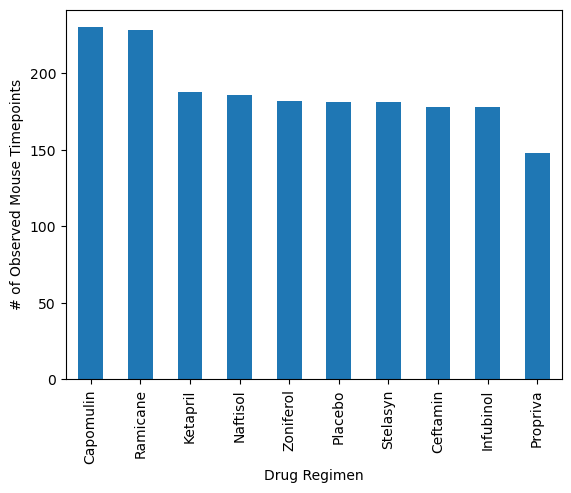

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = mice_clean_data.groupby('Drug Regimen').size()

# Sort the counts in descending order
regimen_counts = regimen_counts.sort_values(ascending=False)

# Plot the data
regimen_counts.plot(kind='bar')

# Customize the plot

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

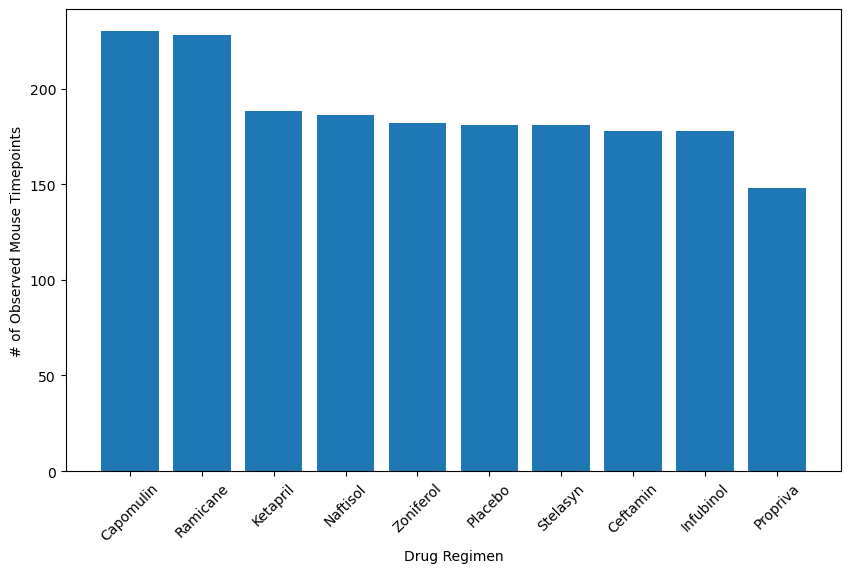

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts.values)

# Customize the plot

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()

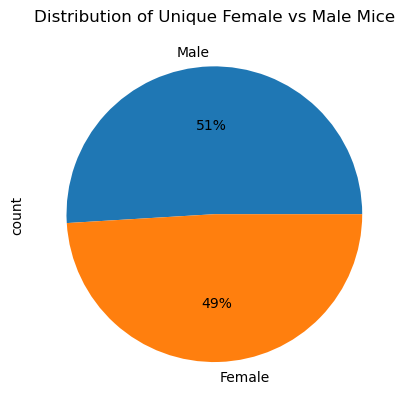

In [77]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = mice_clean_data['Sex'].value_counts()
# Get the unique mice with their gender

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.0f%%', startangle=0)

# Customize the plot
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')  # Hide the y-label
plt.show()


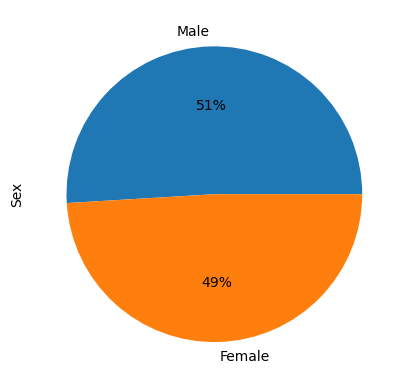

In [78]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
sex_label = gender_counts.index.values
count_value = gender_counts.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = mice_clean_data.loc[(mice_clean_data["Drug Regimen"] == "Capomulin") | (mice_clean_data["Drug Regimen"] == "Ramicane") |
                                        (mice_clean_data["Drug Regimen"] == "Infubinol") |(mice_clean_data["Drug Regimen"] == "Ceftamin") ]



# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = reduced_drug_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, reduced_drug_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume_df = pd.DataFrame({
    "Capomulin": final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],
    "Ramicane": final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"],
    "Infubinol": final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"],
    "Ceftamin": final_tumor_volume[final_tumor_volume["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]
})

final_tumor_volume_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,NaN,NaN,67.973419,NaN
1,NaN,NaN,65.525743,NaN
2,NaN,NaN,NaN,62.999356
3,NaN,38.407618,NaN,NaN
4,NaN,43.047543,NaN,NaN
...,...,...,...,...
95,NaN,NaN,NaN,68.594745
96,31.896238,NaN,NaN,NaN
97,NaN,NaN,NaN,64.729837
98,NaN,30.638696,NaN,NaN


In [92]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_drug_data["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)


# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.
lowerq = []
upperq = []
for drug in treatment:    
     # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_data = mice_clean_data[mice_clean_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = drug_data[.25]
    upperq = drug_data[.75]
    drug_iqr = upperq-lowerq


    # add subset
    tum_vol.append(drug_data)

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * drug_iqr)
    upper_bound = upperq + (1.5 * drug_iqr)
    
    outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]

    print(f"{drug} Potential outliers: {outliers}")
    print()




    

Capomulin Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



Text(0.5, 0, '')

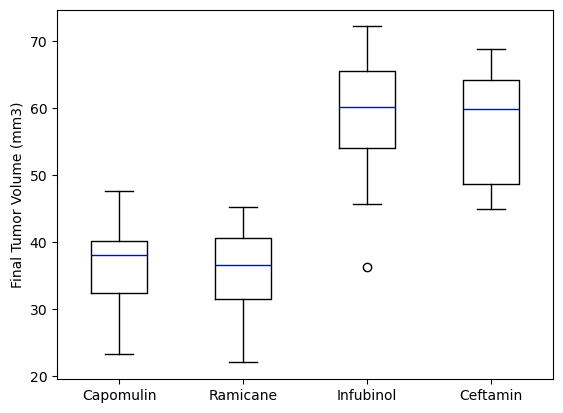

In [98]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
boxplot = final_tumor_volume_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

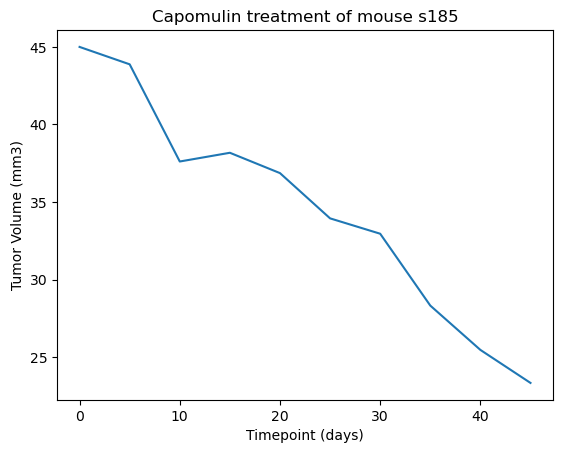

In [102]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = mice_clean_data.loc[(mice_clean_data["Drug Regimen"] == "Capomulin") & (mice_clean_data["Mouse ID"] == "s185") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
